**ADVANCED MACHINE LEARNING ASSIGNMENT 2: NEURAL NETWORKS**

(Arcot Balraj Tanmaiyee | tarcotba@kent.edu | 811321962)

In [6]:
# Loading the data set
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [7]:
# Accessing the review from the given dataset.
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [8]:
# Accessing the labels
train_labels[0]

1

In [9]:
max([max(sequence) for sequence in train_data]) # highest integer value.

9999

In [10]:
# Converting reviews to text

word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [11]:
# Encoding the integer sequences via multi-hot encoding

import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [13]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [14]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [15]:
# Creating a validation set

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

BASE MODEL

In [16]:
# Base Model (discussed in class)

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [17]:
# Training the model (Base model)

Base_model = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
Base_model_dict = Base_model.history
Base_model_dict.keys()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - accuracy: 0.7196 - loss: 0.5806 - val_accuracy: 0.8579 - val_loss: 0.3874
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.8932 - loss: 0.3281 - val_accuracy: 0.8858 - val_loss: 0.3073
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9271 - loss: 0.2356 - val_accuracy: 0.8844 - val_loss: 0.2918
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9424 - loss: 0.1854 - val_accuracy: 0.8858 - val_loss: 0.2821
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9552 - loss: 0.1523 - val_accuracy: 0.8853 - val_loss: 0.2799
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9553 - loss: 0.1355 - val_accuracy: 0.8879 - val_loss: 0.2862
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.9690 - loss: 0.1084 - val_accuracy: 0.8832 - val_loss: 0.3080
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9737 - loss: 0.0920 - val_accuracy: 0.8709 - 

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

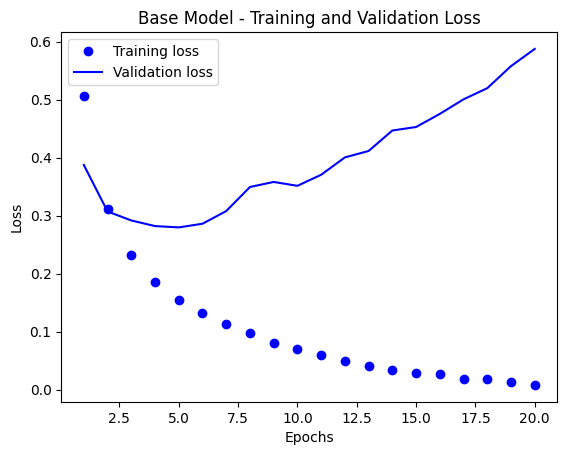

In [94]:
# Plotting the training and validation loss

import matplotlib.pyplot as plt
Base_model_dict = Base_model.history
loss_values_0 = Base_model_dict["loss"]
val_loss_values_0 = Base_model_dict["val_loss"]
epochs = range(1, len(loss_values_0) + 1)
plt.plot(epochs, loss_values_0, "bo", label="Training loss")
plt.plot(epochs, val_loss_values_0, "b", label="Validation loss")
plt.title("Base Model - Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

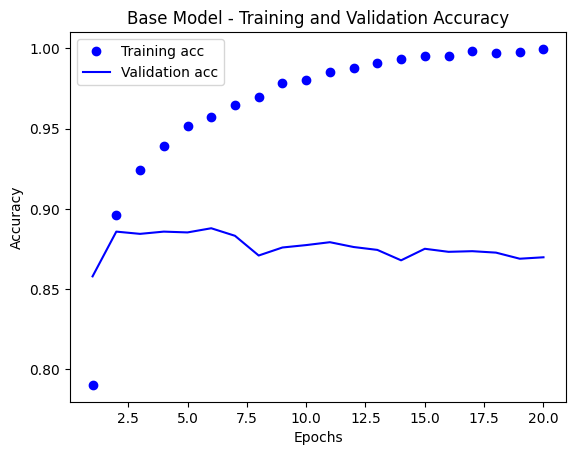

In [95]:
# Plotting Accuracy

plt.clf()
acc_0 = Base_model_dict["accuracy"]
val_acc_0 = Base_model_dict["val_accuracy"]
plt.plot(epochs, acc_0, "bo", label="Training acc")
plt.plot(epochs, val_acc_0, "b", label="Validation acc")
plt.title("Base Model - Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [20]:
# Retraining the model and evaluating the test set.

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
Base_model_results = model.evaluate(x_test, y_test)
Base_model_results

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7326 - loss: 0.5709
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8964 - loss: 0.3067
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9221 - loss: 0.2243
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9328 - loss: 0.1885
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8858 - loss: 0.2834


[0.2814631760120392, 0.8873999714851379]

In [21]:
# Using train data to predict

model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.22256815],
       [0.9994179 ],
       [0.85478336],
       ...,
       [0.12011112],
       [0.07131924],
       [0.62550896]], dtype=float32)

Q1. You used two hidden layers. Try using one or three hidden layers, and see how doing so affects validation and test accuracy.

MODEL 1 - Single hidden layer

In [22]:
# Model with 1 hidden layer (MODEL 1)

from tensorflow import keras
from tensorflow.keras import layers

model_1 = keras.Sequential([
    layers.Dense(16, activation="relu"), # hidden layer 1
    layers.Dense(1, activation="sigmoid")
])

model_1.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [23]:
# Model With 1 Hidden Layer

Model_1_HL = model_1.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.7031 - loss: 0.5869 - val_accuracy: 0.8657 - val_loss: 0.3994
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.8929 - loss: 0.3509 - val_accuracy: 0.8826 - val_loss: 0.3265
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.9165 - loss: 0.2701 - val_accuracy: 0.8870 - val_loss: 0.2984
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9279 - loss: 0.2298 - val_accuracy: 0.8893 - val_loss: 0.2818
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9420 - loss: 0.1940 - val_accuracy: 0.8887 - val_loss: 0.2747
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9492 - loss: 0.1722 - val_accuracy: 0.8871 - val_loss: 0.2768
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9549 - loss: 0.1514 - val_accuracy: 0.8869 - val_loss: 0.2782
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9606 - loss: 0.1371 - val_accuracy: 0.8842 - v

In [24]:
Model_1_Hidden_Layer_dict = Model_1_HL.history
Model_1_Hidden_Layer_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

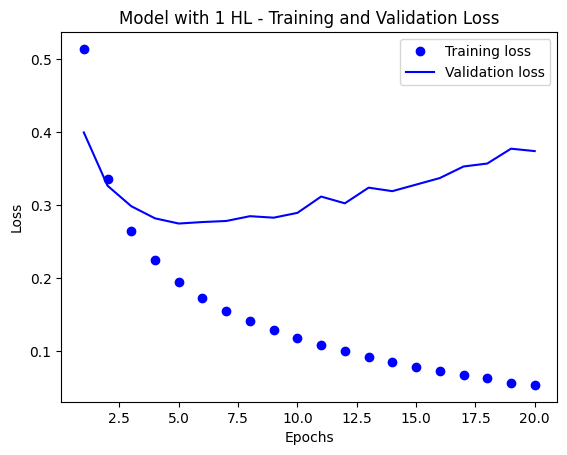

In [97]:
# Plotting the training and validation loss

import matplotlib.pyplot as plt
Model_1_Hidden_Layer_dict = Model_1_HL.history
loss_values_1 = Model_1_Hidden_Layer_dict["loss"]
val_loss_values_1 = Model_1_Hidden_Layer_dict["val_loss"]
epochs = range(1, len(loss_values_1) + 1)
plt.plot(epochs, loss_values_1, "bo", label="Training loss")
plt.plot(epochs, val_loss_values_1, "b", label="Validation loss")
plt.title("Model with 1 HL - Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

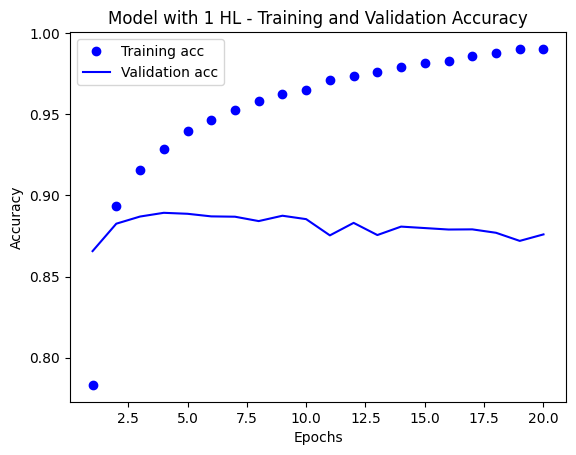

In [98]:
# Plotting Accuracy

plt.clf()
acc_1 = Model_1_Hidden_Layer_dict["accuracy"]
val_acc_1 = Model_1_Hidden_Layer_dict["val_accuracy"]
plt.plot(epochs, acc_1, "bo", label="Training acc")
plt.plot(epochs, val_acc_1, "b", label="Validation acc")
plt.title("Model with 1 HL - Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [28]:
# Retraining the model and evaluating the test set.

model_1 = keras.Sequential([
    layers.Dense(16, activation="relu"), # 1 Hidden Layer
    layers.Dense(1, activation="sigmoid")
])
model_1.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_1.fit(x_train, y_train, epochs=4, batch_size=512)
Model_1_Hidden_Layer_Results = model_1.evaluate(x_test, y_test)
Model_1_Hidden_Layer_Results

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.7432 - loss: 0.5466
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8973 - loss: 0.3002
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9220 - loss: 0.2349
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9320 - loss: 0.1992
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8843 - loss: 0.2799


[0.27973300218582153, 0.8863199949264526]

In [29]:
model_1.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.21964388],
       [0.99952734],
       [0.7058631 ],
       ...,
       [0.11108708],
       [0.10676713],
       [0.4839145 ]], dtype=float32)

MODEL 2 - 3 hidden layers

In [30]:
# Model with 3 hidden layers (MODEL 2)

from tensorflow import keras
from tensorflow.keras import layers

model_2 = keras.Sequential([
    layers.Dense(16, activation="relu"), # hidden layer 1
    layers.Dense(16, activation="relu"), # hidden layer 2
    layers.Dense(16, activation="relu"), # hidden layer 3
    layers.Dense(1, activation="sigmoid")
])

model_2.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [31]:
# Model With 3 Hidden Layer

Model_3_HL = model_2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.6961 - loss: 0.6088 - val_accuracy: 0.8694 - val_loss: 0.3989
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8946 - loss: 0.3399 - val_accuracy: 0.8737 - val_loss: 0.3274
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.9159 - loss: 0.2458 - val_accuracy: 0.8743 - val_loss: 0.3125
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9387 - loss: 0.1883 - val_accuracy: 0.8910 - val_loss: 0.2761
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9515 - loss: 0.1482 - val_accuracy: 0.8844 - val_loss: 0.3018
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9588 - loss: 0.1260 - val_accuracy: 0.8718 - val_loss: 0.3261
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9692 - loss: 0.1010 - val_accuracy: 0.8849 - val_loss: 0.3204
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9801 - loss: 0.0788 - val_accuracy: 0.8595 - v

In [32]:
Model_3_Hidden_Layer_dict = Model_3_HL.history
Model_3_Hidden_Layer_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

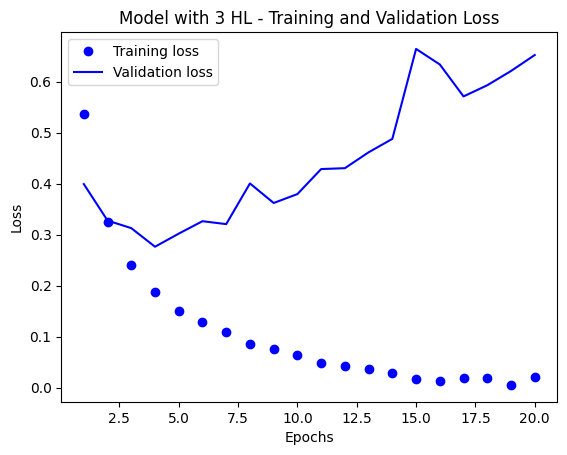

In [99]:
# Plotting the training and validation loss

import matplotlib.pyplot as plt
Model_3_Hidden_Layer_dict = Model_3_HL.history
loss_values_3 = Model_3_Hidden_Layer_dict["loss"]
val_loss_values_3 = Model_3_Hidden_Layer_dict["val_loss"]
epochs = range(1, len(loss_values_3) + 1)
plt.plot(epochs, loss_values_3, "bo", label="Training loss")
plt.plot(epochs, val_loss_values_3, "b", label="Validation loss")
plt.title("Model with 3 HL - Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

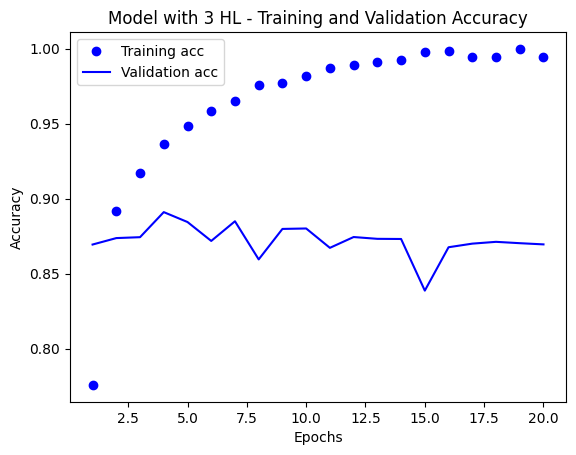

In [100]:
# Plotting Accuracy

plt.clf()
acc_3 = Model_3_Hidden_Layer_dict["accuracy"]
val_acc_3 = Model_3_Hidden_Layer_dict["val_accuracy"]
plt.plot(epochs, acc_3, "bo", label="Training acc")
plt.plot(epochs, val_acc_3, "b", label="Validation acc")
plt.title("Model with 3 HL - Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [38]:
# Retraining the model and evaluating the test set.

model_2 = keras.Sequential([
    layers.Dense(16, activation="relu"), # 1 Hidden Layer
    layers.Dense(16, activation="relu"), # 2 Hidden Layer
    layers.Dense(16, activation="relu"), # 3 Hidden Layer
    layers.Dense(1, activation="sigmoid")
])
model_2.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_2.fit(x_train, y_train, epochs=6, batch_size=512) # Epochs selected 6 because it starts to dip from 7
Model_3_Hidden_Layer_Results = model_2.evaluate(x_test, y_test)

Model_3_Hidden_Layer_Results

Epoch 1/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.6842 - loss: 0.5994
Epoch 2/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8983 - loss: 0.2923
Epoch 3/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9234 - loss: 0.2137
Epoch 4/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9407 - loss: 0.1691
Epoch 5/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9468 - loss: 0.1523
Epoch 6/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9553 - loss: 0.1285
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8646 - loss: 0.3743


[0.3744192123413086, 0.8656799793243408]

In [39]:
model_2.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


array([[0.07641606],
       [0.99867857],
       [0.05510132],
       ...,
       [0.06240351],
       [0.01444275],
       [0.51485986]], dtype=float32)

Q2. Try using layers with more hidden units or fewer hidden units: 32 units, 64 units, and so on

MODEL 3 - 32 hidden units

In [40]:
# Model with fewer hidden units 32 (MODEL 3)

from tensorflow import keras
from tensorflow.keras import layers

model_3 = keras.Sequential([
    layers.Dense(32, activation="relu"), # hidden units 32
    layers.Dense(32, activation="relu"), # hidden units 32
    layers.Dense(1, activation="sigmoid")
    ])

model_3.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [41]:
# Model With 32 Hidden Units

Model_32_HU = model_3.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 254ms/step - accuracy: 0.6755 - loss: 0.6027 - val_accuracy: 0.8671 - val_loss: 0.3707
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.8882 - loss: 0.3173 - val_accuracy: 0.8852 - val_loss: 0.2949
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9191 - loss: 0.2331 - val_accuracy: 0.8879 - val_loss: 0.2769
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9418 - loss: 0.1759 - val_accuracy: 0.8248 - val_loss: 0.4391
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9443 - loss: 0.1642 - val_accuracy: 0.8785 - val_loss: 0.3154
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9575 - loss: 0.1269 - val_accuracy: 0.8848 - val_loss: 0.2975
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.9713 - loss: 0.1011 - val_accuracy: 0.8839 - val_loss: 0.3201
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.9722 - loss: 0.0948 - val_accuracy: 0.8752 -

In [42]:
Model_32_Hidden_Units_dict = Model_32_HU.history
Model_32_Hidden_Units_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

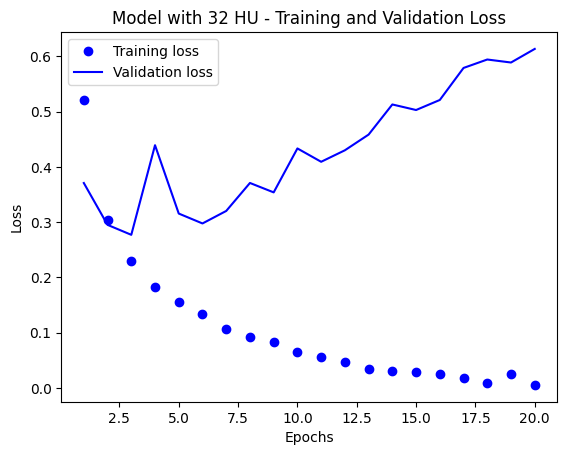

In [102]:
# Plotting the training and validation loss

import matplotlib.pyplot as plt
Model_32_Hidden_Units_dict = Model_32_HU.history
loss_values_32 = Model_32_Hidden_Units_dict["loss"]
val_loss_values_32 = Model_32_Hidden_Units_dict["val_loss"]
epochs = range(1, len(loss_values_32) + 1)
plt.plot(epochs, loss_values_32, "bo", label="Training loss")
plt.plot(epochs, val_loss_values_32, "b", label="Validation loss")
plt.title("Model with 32 HU - Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

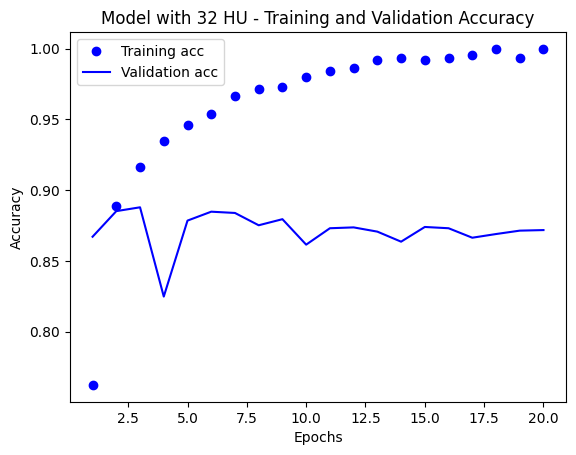

In [101]:
# Plotting Accuracy

plt.clf()
acc_32 = Model_32_Hidden_Units_dict["accuracy"]
val_acc_32 = Model_32_Hidden_Units_dict["val_accuracy"]
plt.plot(epochs, acc_32, "bo", label="Training acc")
plt.plot(epochs, val_acc_32, "b", label="Validation acc")
plt.title("Model with 32 HU - Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [46]:
# Retraining the model and evaluating the test set.

model_3 = keras.Sequential([
    layers.Dense(32, activation="relu"), # 32 Hidden Units
    layers.Dense(32, activation="relu"), # 32 Hidden Units
    layers.Dense(1, activation="sigmoid")
])
model_3.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_3.fit(x_train, y_train, epochs=3, batch_size=512) # Epochs selected 3 because it starts to dip from 3
Model_32_Hidden_Units_Results = model_3.evaluate(x_test, y_test)

Model_32_Hidden_Units_Results

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.7188 - loss: 0.5692
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8972 - loss: 0.2887
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9252 - loss: 0.2114
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8866 - loss: 0.2804


[0.28002914786338806, 0.8881199955940247]

In [48]:
# Using Trained data to predict

model_3.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


array([[0.18321197],
       [0.9979386 ],
       [0.8337405 ],
       ...,
       [0.10949906],
       [0.07896125],
       [0.5684804 ]], dtype=float32)

MODEL 4 - 64 hidden units.

In [49]:
# Model with higher hidden units 64 (MODEL 4)

from tensorflow import keras
from tensorflow.keras import layers

model_4 = keras.Sequential([
    layers.Dense(64, activation="relu"), # hidden units 64
    layers.Dense(64, activation="relu"), # hidden units 64
    layers.Dense(1, activation="sigmoid")
    ])

model_4.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [50]:
# Model With 64 Hidden Units

Model_64_HU = model_4.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - accuracy: 0.6673 - loss: 0.5988 - val_accuracy: 0.8079 - val_loss: 0.4339
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.8784 - loss: 0.3217 - val_accuracy: 0.8821 - val_loss: 0.2966
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.9153 - loss: 0.2314 - val_accuracy: 0.8883 - val_loss: 0.2759
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - accuracy: 0.9374 - loss: 0.1762 - val_accuracy: 0.8843 - val_loss: 0.2935
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.9539 - loss: 0.1387 - val_accuracy: 0.8757 - val_loss: 0.3265
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.9586 - loss: 0.1204 - val_accuracy: 0.8786 - val_loss: 0.3179
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.9722 - loss: 0.0939 - val_accuracy: 0.8734 - val_loss: 0.3413
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.9745 - loss: 0.0814 - val_accuracy: 0.8780 - 

In [51]:
Model_64_Hidden_Units_dict = Model_64_HU.history
Model_64_Hidden_Units_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

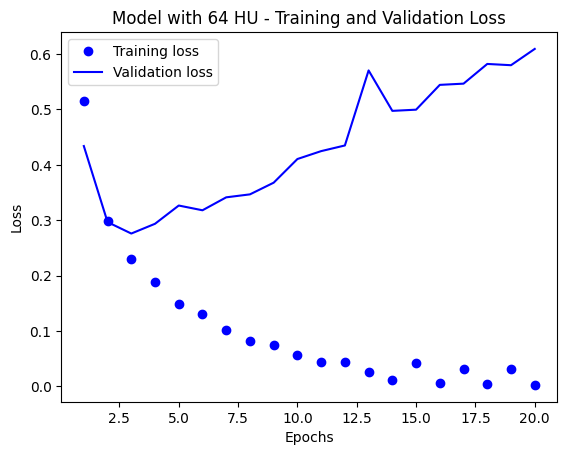

In [103]:
# Plotting the training and validation loss

import matplotlib.pyplot as plt
Model_64_Hidden_Units_dict = Model_64_HU.history
loss_values_64 = Model_64_Hidden_Units_dict["loss"]
val_loss_values_64 = Model_64_Hidden_Units_dict["val_loss"]
epochs = range(1, len(loss_values_64) + 1)
plt.plot(epochs, loss_values_64, "bo", label="Training loss")
plt.plot(epochs, val_loss_values_64, "b", label="Validation loss")
plt.title("Model with 64 HU - Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

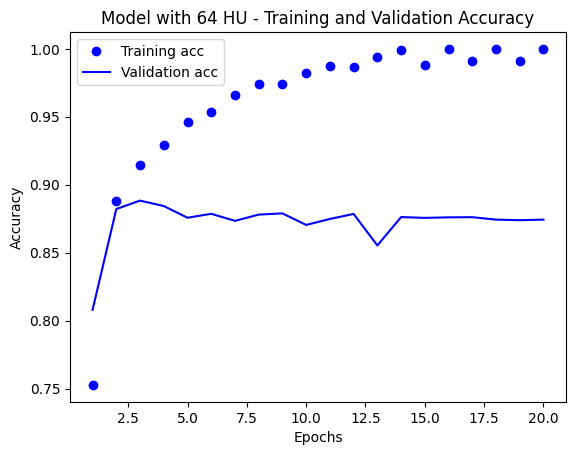

In [104]:
# Plotting Accuracy

plt.clf()
acc_64 = Model_64_Hidden_Units_dict["accuracy"]
val_acc_64 = Model_64_Hidden_Units_dict["val_accuracy"]
plt.plot(epochs, acc_64, "bo", label="Training acc")
plt.plot(epochs, val_acc_64, "b", label="Validation acc")
plt.title("Model with 64 HU - Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [54]:
# Retraining the model and evaluating the test set.

model_4 = keras.Sequential([
    layers.Dense(64, activation="relu"), # 64 Hidden Units
    layers.Dense(64, activation="relu"), # 64 Hidden Units
    layers.Dense(1, activation="sigmoid")
])
model_4.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_4.fit(x_train, y_train, epochs=2, batch_size=512) # Epochs selected 2 because it starts to dip from 2
Model_64_Hidden_Units_Results = model_4.evaluate(x_test, y_test)

Model_64_Hidden_Units_Results

Epoch 1/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.7053 - loss: 0.5462
Epoch 2/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.8914 - loss: 0.2774
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8829 - loss: 0.2853


[0.2858932316303253, 0.883679986000061]

In [56]:
model_4.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.19520871],
       [0.99897045],
       [0.8046993 ],
       ...,
       [0.11473545],
       [0.09820462],
       [0.4886892 ]], dtype=float32)

Q3. Try using the mse loss function instead of binary_crossentropy.

MODEL 5 - MSE loss functions

In [57]:
#  Base model with mse loss function (MODEL 5)

from tensorflow import keras
from tensorflow.keras import layers

model_5 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_5.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

In [58]:
# Model With MSE Loss

Model_MSE_LOSS = model_5.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.6958 - loss: 0.2095 - val_accuracy: 0.8627 - val_loss: 0.1287
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.8850 - loss: 0.1110 - val_accuracy: 0.8793 - val_loss: 0.1016
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9150 - loss: 0.0810 - val_accuracy: 0.8792 - val_loss: 0.0940
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9263 - loss: 0.0665 - val_accuracy: 0.8824 - val_loss: 0.0888
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9413 - loss: 0.0560 - val_accuracy: 0.8847 - val_loss: 0.0851
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9505 - loss: 0.0470 - val_accuracy: 0.8841 - val_loss: 0.0842
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9564 - loss: 0.0437 - val_accuracy: 0.8822 - val_loss: 0.0853
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9656 - loss: 0.0358 - val_accuracy: 0.8816 - v

In [59]:
Model_MSE_LOSS_dict = Model_MSE_LOSS.history
Model_MSE_LOSS_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

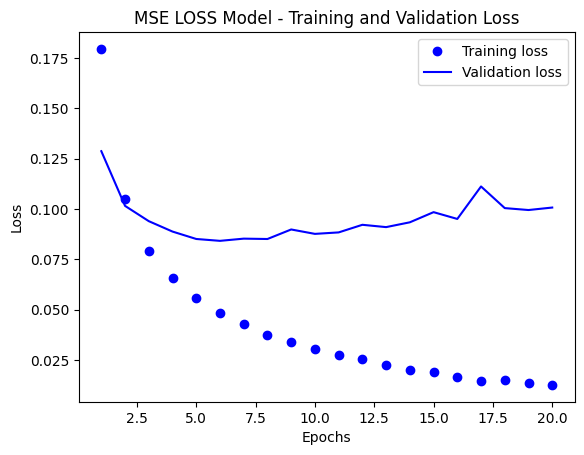

In [105]:
# Plotting the training and validation loss

import matplotlib.pyplot as plt
Model_MSE_LOSS_dict = Model_MSE_LOSS.history
loss_values_MSE = Model_MSE_LOSS_dict["loss"]
val_loss_values_MSE = Model_MSE_LOSS_dict["val_loss"]
epochs = range(1, len(loss_values_MSE) + 1)
plt.plot(epochs, loss_values_MSE, "bo", label="Training loss")
plt.plot(epochs, val_loss_values_MSE, "b", label="Validation loss")
plt.title("MSE LOSS Model - Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

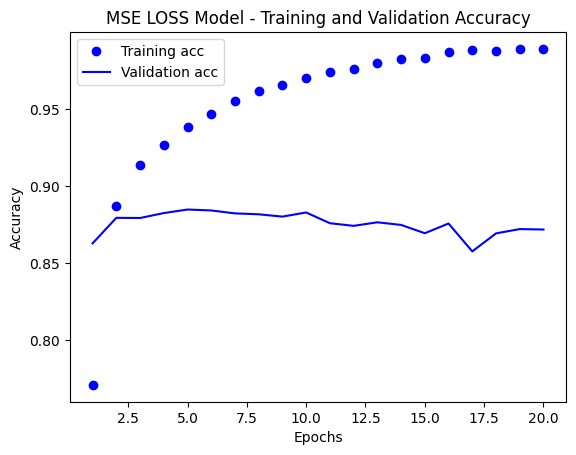

In [106]:
# Plotting Accuracy

plt.clf()
acc_MSE = Model_MSE_LOSS_dict["accuracy"]
val_acc_MSE = Model_MSE_LOSS_dict["val_accuracy"]
plt.plot(epochs, acc_MSE, "bo", label="Training acc")
plt.plot(epochs, val_acc_MSE, "b", label="Validation acc")
plt.title("MSE LOSS Model - Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [62]:
# Retraining the model and evaluating the test set.

model_5 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_5.compile(optimizer="rmsprop",
              loss="mse", # MSE Loss Function
              metrics=["accuracy"])
model_5.fit(x_train, y_train, epochs=4, batch_size=512) # Epochs selected 2 because it starts to dip from 2
Model_MSE_LOSS_Results = model_5.evaluate(x_test, y_test)

Model_MSE_LOSS_Results

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.7138 - loss: 0.1893
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8996 - loss: 0.0866
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9205 - loss: 0.0657
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9328 - loss: 0.0556
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8728 - loss: 0.0934


[0.09197208285331726, 0.8750399947166443]

In [63]:
model_5.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.23717032],
       [0.9979605 ],
       [0.9727892 ],
       ...,
       [0.22258219],
       [0.14532658],
       [0.6944987 ]], dtype=float32)

Q4. Try using the tanh activation (an activation that was popular in the early days of neural networks) instead of relu.

MODEL 6 - tanh activation

In [64]:
# Model with tanh activation insteadof relu (MODEL 6)

model_6 = keras.Sequential([
    layers.Dense(16, activation="tanh"), # tanh activation
    layers.Dense(16, activation="tanh"), # tanh activation
    layers.Dense(1, activation="sigmoid")
])

model_6.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [65]:
# Model With tanh activation

Model_TANH = model_6.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.6957 - loss: 0.5789 - val_accuracy: 0.8645 - val_loss: 0.3706
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.9010 - loss: 0.3034 - val_accuracy: 0.8839 - val_loss: 0.2939
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9262 - loss: 0.2145 - val_accuracy: 0.8846 - val_loss: 0.2798
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9438 - loss: 0.1650 - val_accuracy: 0.8835 - val_loss: 0.2958
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9588 - loss: 0.1222 - val_accuracy: 0.8849 - val_loss: 0.2978
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9716 - loss: 0.0916 - val_accuracy: 0.8806 - val_loss: 0.3475
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9751 - loss: 0.0811 - val_accuracy: 0.8725 - val_loss: 0.3964
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9815 - loss: 0.0643 - val_accuracy: 0.8689 - v

In [66]:
Model_TANH_ACT_dict = Model_TANH.history
Model_TANH_ACT_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

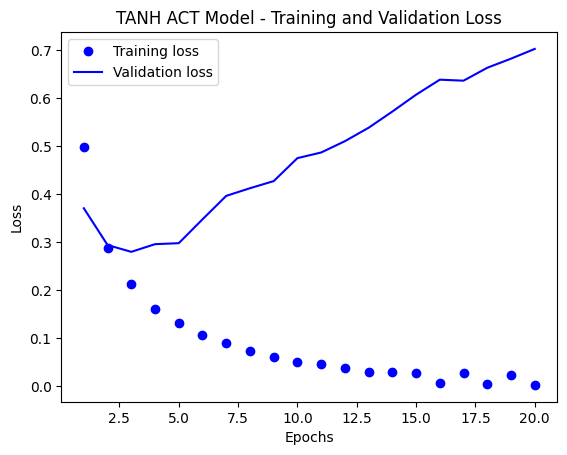

In [107]:
# Plotting the training and validation loss

import matplotlib.pyplot as plt
Model_TANH_ACT_dict = Model_TANH.history
loss_values_TANH = Model_TANH_ACT_dict["loss"]
val_loss_values_TANH = Model_TANH_ACT_dict["val_loss"]
epochs = range(1, len(loss_values_TANH) + 1)
plt.plot(epochs, loss_values_TANH, "bo", label="Training loss")
plt.plot(epochs, val_loss_values_TANH, "b", label="Validation loss")
plt.title("TANH ACT Model - Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

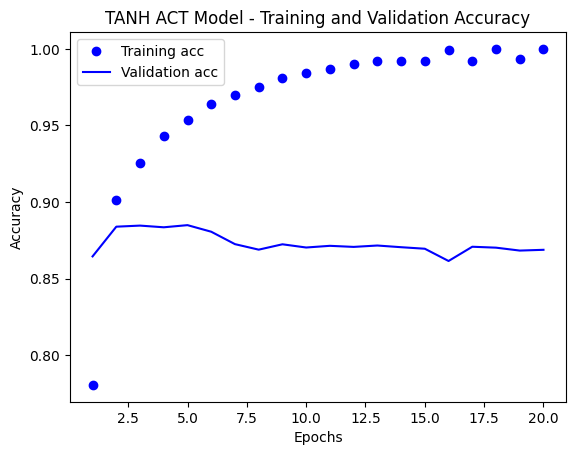

In [108]:
# Plotting Accuracy

plt.clf()
acc_TANH = Model_TANH_ACT_dict["accuracy"]
val_acc_TANH = Model_TANH_ACT_dict["val_accuracy"]
plt.plot(epochs, acc_TANH, "bo", label="Training acc")
plt.plot(epochs, val_acc_TANH, "b", label="Validation acc")
plt.title("TANH ACT Model - Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [69]:
# Retraining the model and evaluating the test set.

model_6 = keras.Sequential([
    layers.Dense(16, activation="tanh"), # tanh activation
    layers.Dense(16, activation="tanh"), # tanh activation
    layers.Dense(1, activation="sigmoid")
])
model_6.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_6.fit(x_train, y_train, epochs=3, batch_size=512) # Epochs selected 3 because it starts to dip from 3
Model_TANH_ACT_Results = model_6.evaluate(x_test, y_test)

Model_TANH_ACT_Results

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.7588 - loss: 0.5286
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9044 - loss: 0.2731
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9314 - loss: 0.1926
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8831 - loss: 0.2883


[0.2890131175518036, 0.8838000297546387]

In [71]:
model_6.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.1081448 ],
       [0.99310356],
       [0.8162753 ],
       ...,
       [0.05440116],
       [0.05288954],
       [0.35261714]], dtype=float32)

Q5. Use any technique we studied in class, and these include regularization, dropout, etc., to get your model to perform better on validation.

MODEL 7 - Regularization

In [72]:
# Model with regularization (MODEL 7)

from tensorflow.keras import regularizers

model_7 = keras.Sequential([
    layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.001)), # Applied L2 regularization (0.001 - common accepted value)
    layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.001)), # Applied L2 regularization (0.001 - common accepted value)
    layers.Dense(1, activation="sigmoid")
])

model_7.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [73]:
# Model With L2 Regularization

Model_Reg = model_7.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.6931 - loss: 0.6579 - val_accuracy: 0.8637 - val_loss: 0.4732
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.8823 - loss: 0.4185 - val_accuracy: 0.8482 - val_loss: 0.4207
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.9165 - loss: 0.3187 - val_accuracy: 0.8770 - val_loss: 0.3603
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9303 - loss: 0.2711 - val_accuracy: 0.8876 - val_loss: 0.3331
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9399 - loss: 0.2439 - val_accuracy: 0.8661 - val_loss: 0.3783
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9445 - loss: 0.2256 - val_accuracy: 0.8804 - val_loss: 0.3472
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9555 - loss: 0.2056 - val_accuracy: 0.8763 - val_loss: 0.3626
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9535 - loss: 0.1988 - val_accuracy: 0.8827 - v

In [74]:
Model_Reg_Tech_dict = Model_Reg.history
Model_Reg_Tech_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

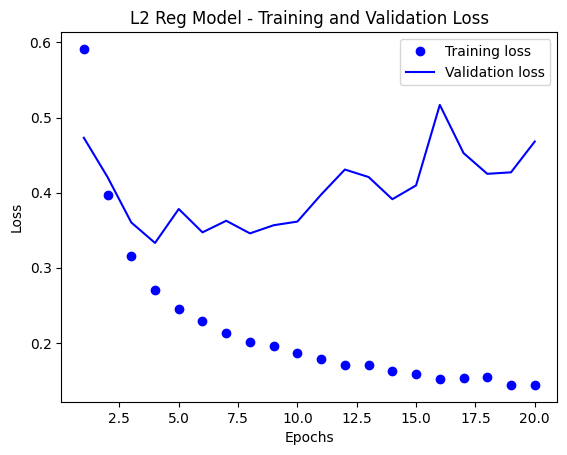

In [109]:
# Plotting the training and validation loss

import matplotlib.pyplot as plt
Model_Reg_Tech_dict = Model_Reg.history
loss_values_Reg = Model_Reg_Tech_dict["loss"]
val_loss_values_Reg = Model_Reg_Tech_dict["val_loss"]
epochs = range(1, len(loss_values_Reg) + 1)
plt.plot(epochs, loss_values_Reg, "bo", label="Training loss")
plt.plot(epochs, val_loss_values_Reg, "b", label="Validation loss")
plt.title("L2 Reg Model - Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

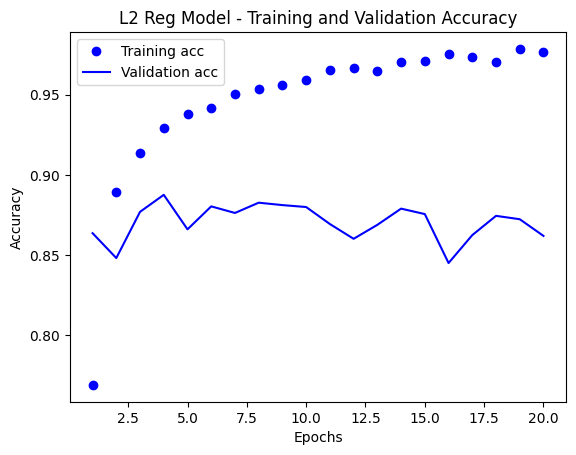

In [110]:
# Plotting Accuracy

plt.clf()
acc_Reg = Model_Reg_Tech_dict["accuracy"]
val_acc_Reg = Model_Reg_Tech_dict["val_accuracy"]
plt.plot(epochs, acc_Reg, "bo", label="Training acc")
plt.plot(epochs, val_acc_Reg, "b", label="Validation acc")
plt.title("L2 Reg Model - Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [77]:
# Retraining the model and evaluating the test set.

model_7 = keras.Sequential([
    layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.001)), # Applied L2 regularization (0.001 - common accepted value)
    layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.001)), # Applied L2 regularization (0.001 - common accepted value)
    layers.Dense(1, activation="sigmoid")
])
model_7.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_7.fit(x_train, y_train, epochs=2, batch_size=512) # Epochs selected 2 because it starts to dip from 3
Model_Reg_Tech_Results = model_7.evaluate(x_test, y_test)

Model_Reg_Tech_Results

Epoch 1/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.7222 - loss: 0.6238
Epoch 2/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.8997 - loss: 0.3573
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8849 - loss: 0.3466


[0.3467257022857666, 0.885919988155365]

In [78]:
model_7.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.32458943],
       [0.9803532 ],
       [0.7992738 ],
       ...,
       [0.13193968],
       [0.16213422],
       [0.40700176]], dtype=float32)

MODEL 8 - Dropout

In [79]:
# Model with dropout (MODEL 8)
model_8 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

model_8.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])


In [80]:
# Model With Dropout Technique`

Model_Drp = model_8.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.5731 - loss: 0.6737 - val_accuracy: 0.7914 - val_loss: 0.5693
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7361 - loss: 0.5595 - val_accuracy: 0.8620 - val_loss: 0.4603
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8108 - loss: 0.4647 - val_accuracy: 0.8767 - val_loss: 0.3806
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8513 - loss: 0.3958 - val_accuracy: 0.8673 - val_loss: 0.3447
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8752 - loss: 0.3419 - val_accuracy: 0.8830 - val_loss: 0.3034
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8965 - loss: 0.3070 - val_accuracy: 0.8833 - val_loss: 0.2870
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9113 - loss: 0.2600 - val_accuracy: 0.8862 - val_loss: 0.2883
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9244 - loss: 0.2300 - val_accuracy: 0.8881 - v

In [81]:
Model_Drp_Tech_dict = Model_Drp.history
Model_Drp_Tech_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

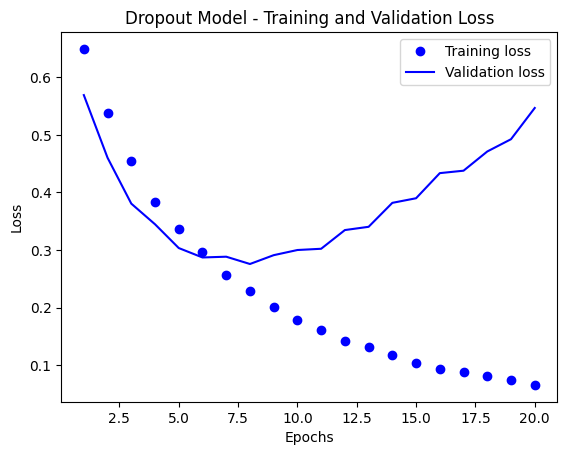

In [111]:
# Plotting the training and validation loss

import matplotlib.pyplot as plt
Model_Drp_Tech_dict = Model_Drp.history
loss_values_Drp = Model_Drp_Tech_dict["loss"]
val_loss_values_Drp = Model_Drp_Tech_dict["val_loss"]
epochs = range(1, len(loss_values_Drp) + 1)
plt.plot(epochs, loss_values_Drp, "bo", label="Training loss")
plt.plot(epochs, val_loss_values_Drp, "b", label="Validation loss")
plt.title("Dropout Model - Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

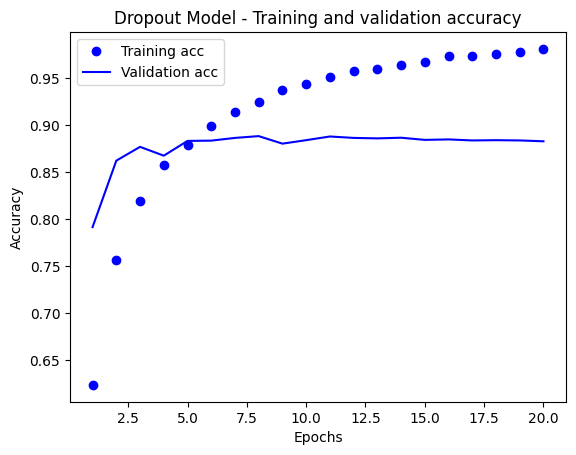

In [83]:
# Plotting Accuracy

plt.clf()
acc_Drp = Model_Drp_Tech_dict["accuracy"]
val_acc_Drp = Model_Drp_Tech_dict["val_accuracy"]
plt.plot(epochs, acc_Drp, "bo", label="Training acc")
plt.plot(epochs, val_acc_Drp, "b", label="Validation acc")
plt.title("Dropout Model - Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [84]:
# Retraining the model and evaluating the test set.

model_8 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model_8.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_8.fit(x_train, y_train, epochs=9, batch_size=512) # Epochs selected 9 because it starts to stablize from 9
Model_Drp_Tech_Results = model_8.evaluate(x_test, y_test)

Model_Drp_Tech_Results

Epoch 1/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.5953 - loss: 0.6582
Epoch 2/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7782 - loss: 0.5037
Epoch 3/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8483 - loss: 0.3900
Epoch 4/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.8820 - loss: 0.3224
Epoch 5/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9056 - loss: 0.2734
Epoch 6/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9179 - loss: 0.2424
Epoch 7/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9265 - loss: 0.2132
Epoch 8/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9334 - loss: 0.1964
Epoch 9/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9397 - loss: 0.1776
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8824 - loss: 0.3313


[0.3267556428909302, 0.8854799866676331]

In [85]:
model_8.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.0849461 ],
       [0.9999973 ],
       [0.98906696],
       ...,
       [0.08372855],
       [0.0389623 ],
       [0.733168  ]], dtype=float32)

Comparison of the Models

In [86]:
# Retrieveing the train history for all models
Base_model_dict = Base_model.history
Base_model_dict.keys()

Model_1_Hidden_Layer_dict = Model_1_HL.history
Model_1_Hidden_Layer_dict.keys()

Model_3_Hidden_Layer_dict = Model_3_HL.history
Model_3_Hidden_Layer_dict.keys()

Model_32_Hidden_Units_dict = Model_32_HU.history
Model_32_Hidden_Units_dict.keys()

Model_64_Hidden_Units_dict = Model_64_HU.history
Model_64_Hidden_Units_dict.keys()

Model_MSE_LOSS_dict = Model_MSE_LOSS.history
Model_MSE_LOSS_dict.keys()

Model_TANH_ACT_dict = Model_TANH.history
Model_TANH_ACT_dict.keys()

Model_Reg_Tech_dict = Model_Reg.history
Model_Reg_Tech_dict.keys()

Model_Drp_Tech_dict = Model_Drp.history
Model_Drp_Tech_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Comparing Hidden layers with Base Model


Base_Model history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_1_Hidden_Layer history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_3_Hidden_Layer history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


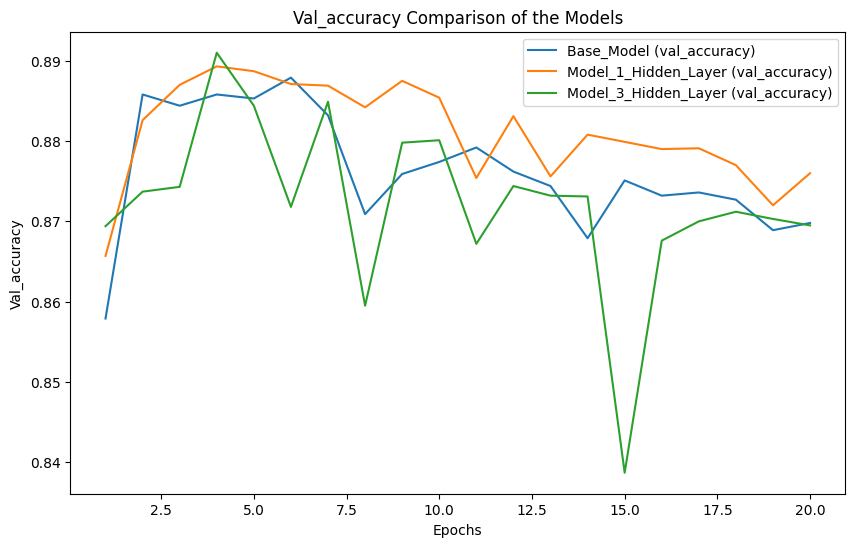

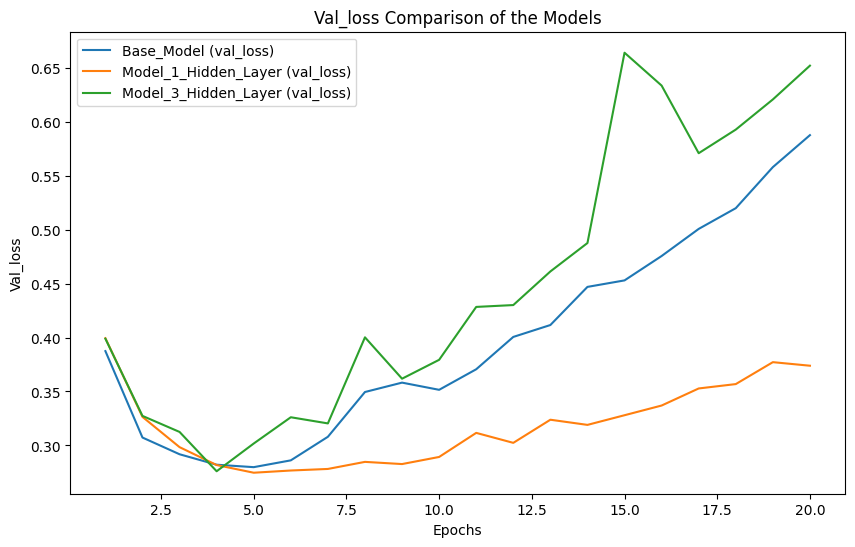

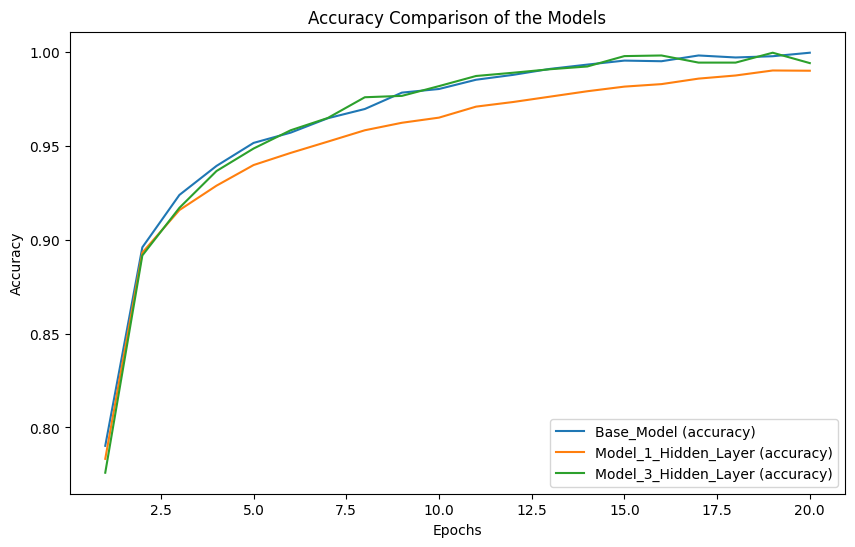

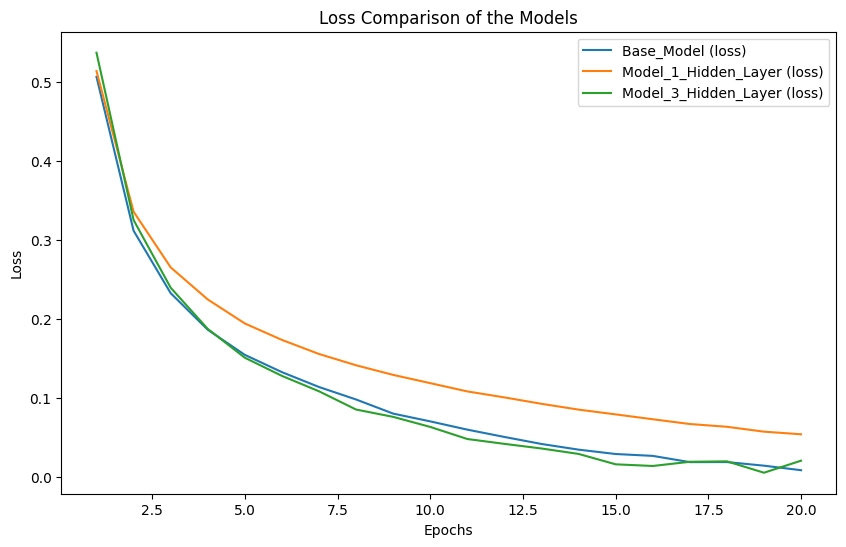

In [129]:
import matplotlib.pyplot as plt

# Dictionary of models and their histories
model_histories = {
    "Base_Model": Base_model,
    "Model_1_Hidden_Layer": Model_1_HL,
    "Model_3_Hidden_Layer": Model_3_HL,
}

# Extract and display the histories
for model_name, model in model_histories.items():
    history_dict = model.history
    print(f"{model_name} history keys: {history_dict.keys()}")

# plot training and validation accuracy/loss across models
def plot_metrics(metric):
    plt.figure(figsize=(10, 6))
    for model_name, model in model_histories.items():
        metric_values = model.history[metric]
        plt.plot(range(1, len(metric_values) + 1), metric_values, label=f"{model_name} ({metric})")

    plt.title(f'{metric.capitalize()} Comparison of the Models')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.show()

plot_metrics('val_accuracy')

plot_metrics('val_loss')

plot_metrics('accuracy')

plot_metrics('loss')

Comparing Base model with Hidden Units value of 32 and 64


Base_Model history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_32_Hidden_Units history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_64_Hidden_Units history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


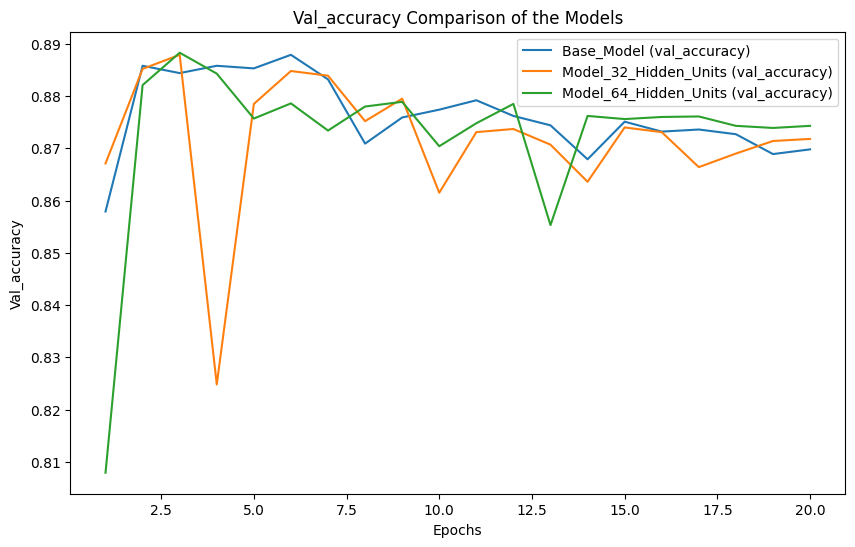

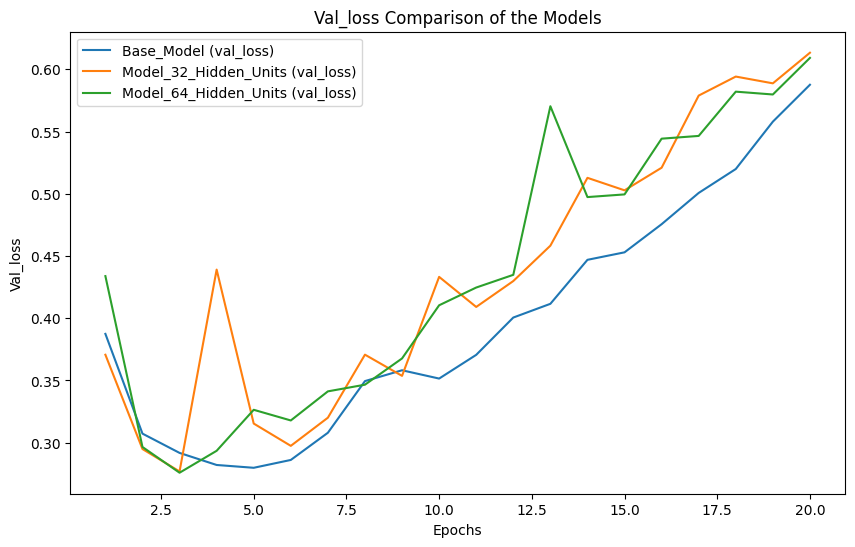

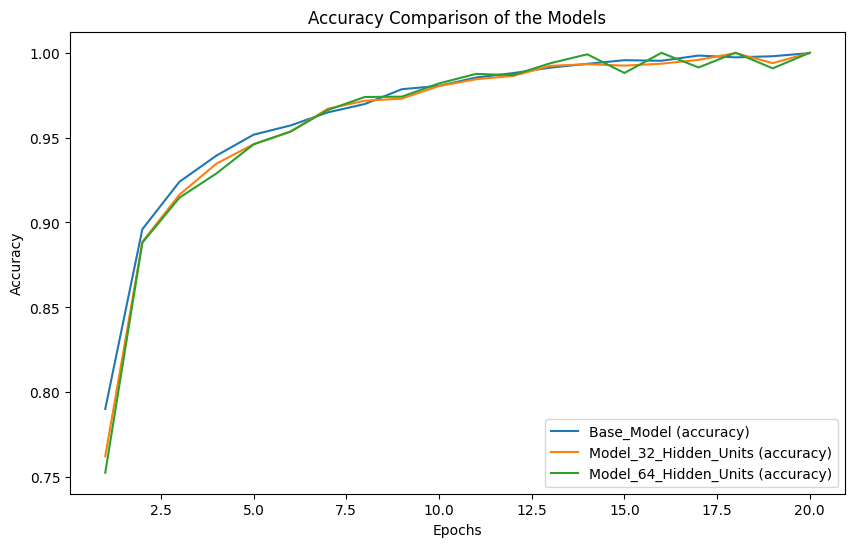

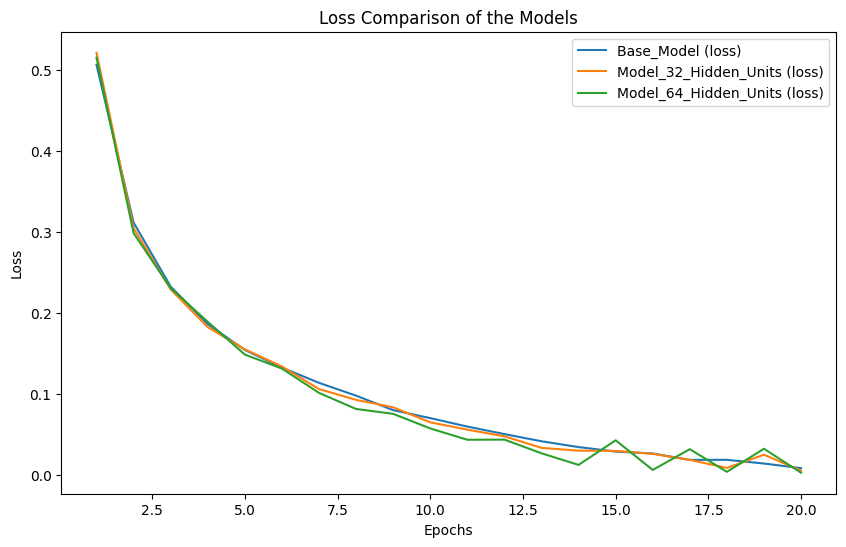

In [128]:
import matplotlib.pyplot as plt

# Dictionary of models and their histories
model_histories = {
    "Base_Model": Base_model,
    "Model_32_Hidden_Units": Model_32_HU,
    "Model_64_Hidden_Units": Model_64_HU,
}

# Extract and display keys of histories
for model_name, model in model_histories.items():
    history_dict = model.history
    print(f"{model_name} history keys: {history_dict.keys()}")

# Function to plot training and validation accuracy/loss across models
def plot_metrics(metric):
    plt.figure(figsize=(10, 6))
    for model_name, model in model_histories.items():
        metric_values = model.history[metric]
        plt.plot(range(1, len(metric_values) + 1), metric_values, label=f"{model_name} ({metric})")

    plt.title(f'{metric.capitalize()} Comparison of the Models')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.show()

# Plot validation accuracy
plot_metrics('val_accuracy')

# Plot validation loss
plot_metrics('val_loss')

plot_metrics('accuracy')

plot_metrics('loss')

Comparing of MSE loss function


Base_Model history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_MSE_Loss history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


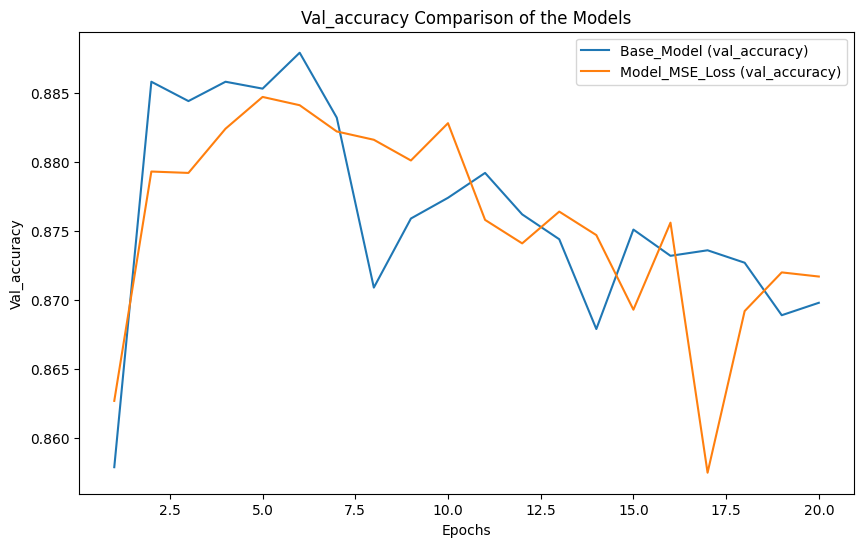

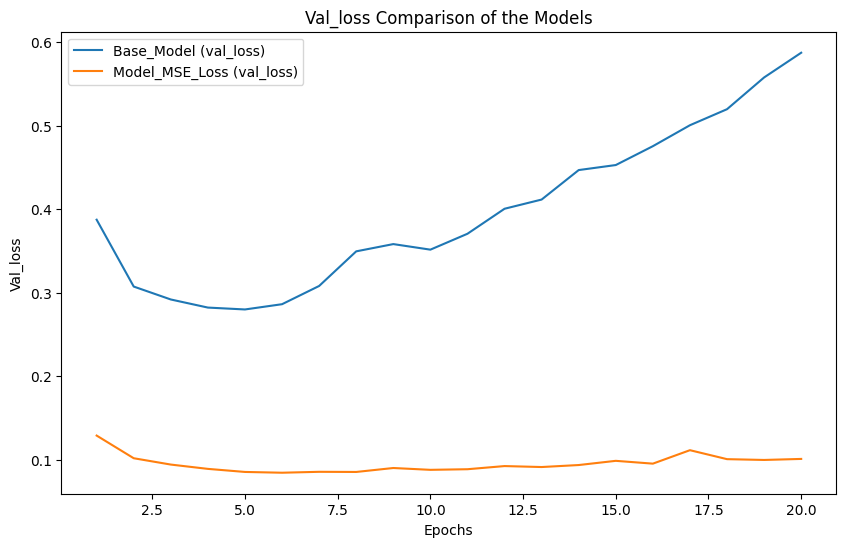

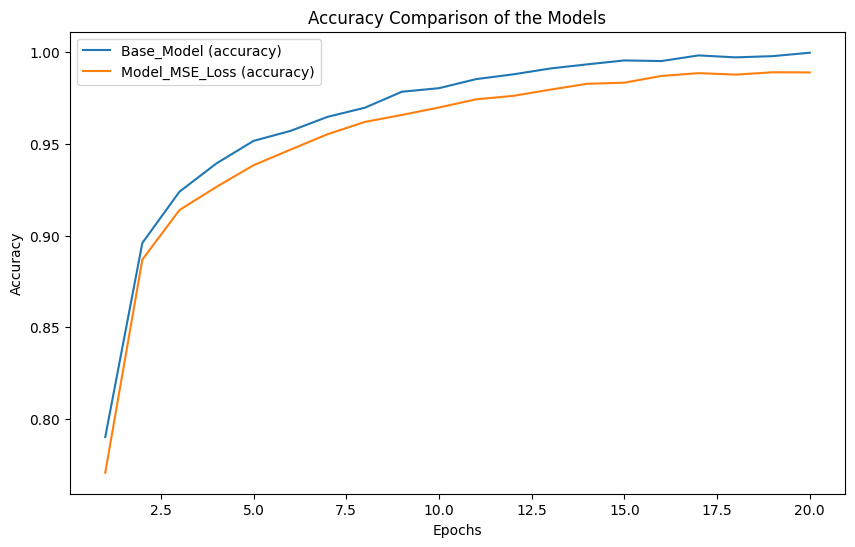

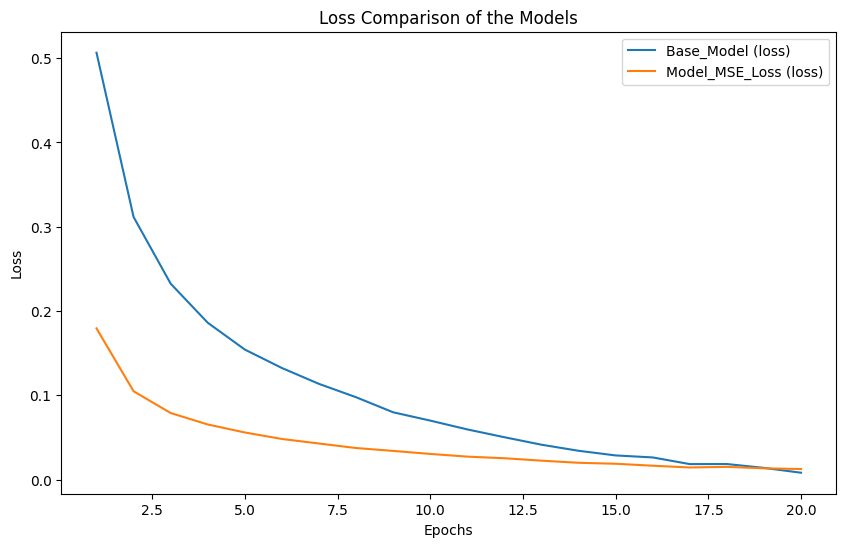

In [127]:
import matplotlib.pyplot as plt

# Dictionary of models and their histories
model_histories = {
    "Base_Model": Base_model,
    "Model_MSE_Loss": Model_MSE_LOSS,
 }

# Extract and display keys of histories
for model_name, model in model_histories.items():
    history_dict = model.history
    print(f"{model_name} history keys: {history_dict.keys()}")

# Function to plot training and validation accuracy/loss across models
def plot_metrics(metric):
    plt.figure(figsize=(10, 6))
    for model_name, model in model_histories.items():
        metric_values = model.history[metric]
        plt.plot(range(1, len(metric_values) + 1), metric_values, label=f"{model_name} ({metric})")

    plt.title(f'{metric.capitalize()} Comparison of the Models')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.show()

# Plot validation accuracy
plot_metrics('val_accuracy')

# Plot validation loss
plot_metrics('val_loss')

plot_metrics('accuracy')

plot_metrics('loss')


Comparing of Tanh activation with base model


Base_Model history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_TANH_Activation history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


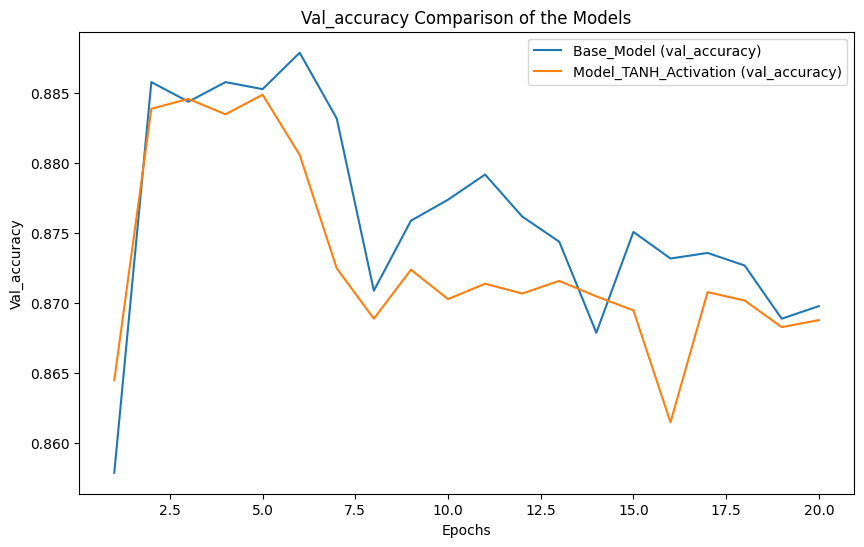

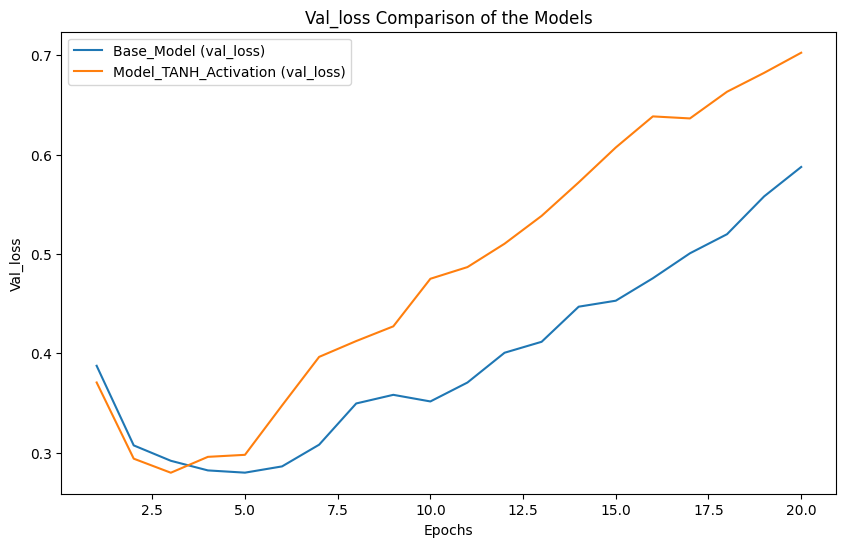

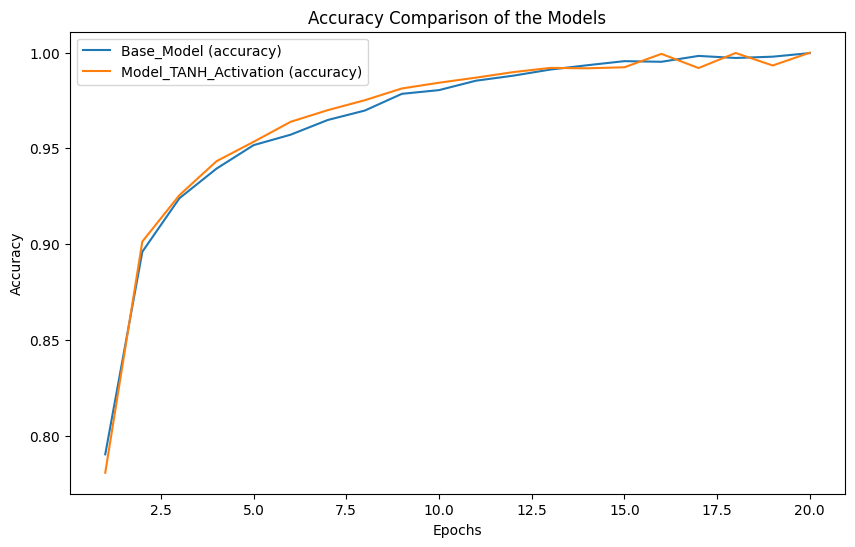

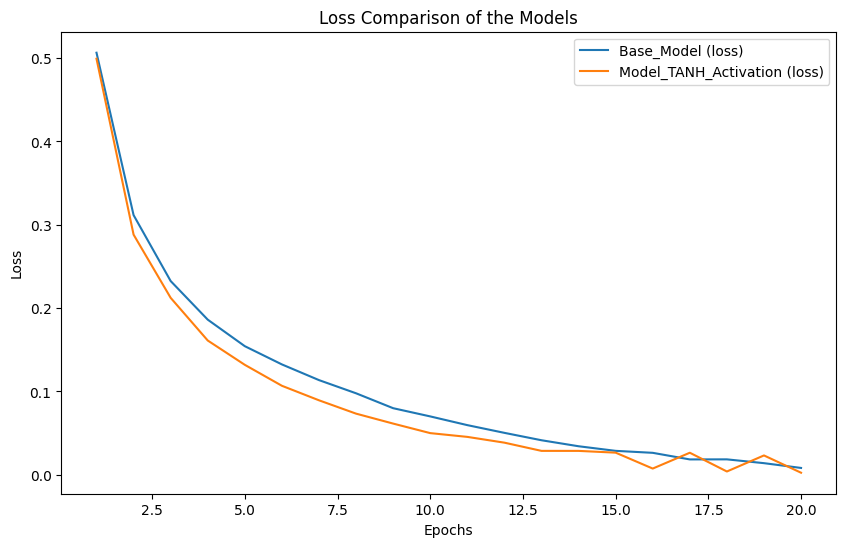

In [126]:
import matplotlib.pyplot as plt

# Dictionary of models and their histories
model_histories = {
    "Base_Model": Base_model,
    "Model_TANH_Activation": Model_TANH,
}

# Extract and display keys of histories
for model_name, model in model_histories.items():
    history_dict = model.history
    print(f"{model_name} history keys: {history_dict.keys()}")

# Function to plot training and validation accuracy/loss across models
def plot_metrics(metric):
    plt.figure(figsize=(10, 6))
    for model_name, model in model_histories.items():
        metric_values = model.history[metric]
        plt.plot(range(1, len(metric_values) + 1), metric_values, label=f"{model_name} ({metric})")

    plt.title(f'{metric.capitalize()} Comparison of the Models')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.show()

# Plot validation accuracy
plot_metrics('val_accuracy')

# Plot validation loss
plot_metrics('val_loss')

plot_metrics('accuracy')

plot_metrics('loss')

Comparison of L2 regularization, Dropout and Base model


Base_Model history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_Regularization history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_Dropout history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


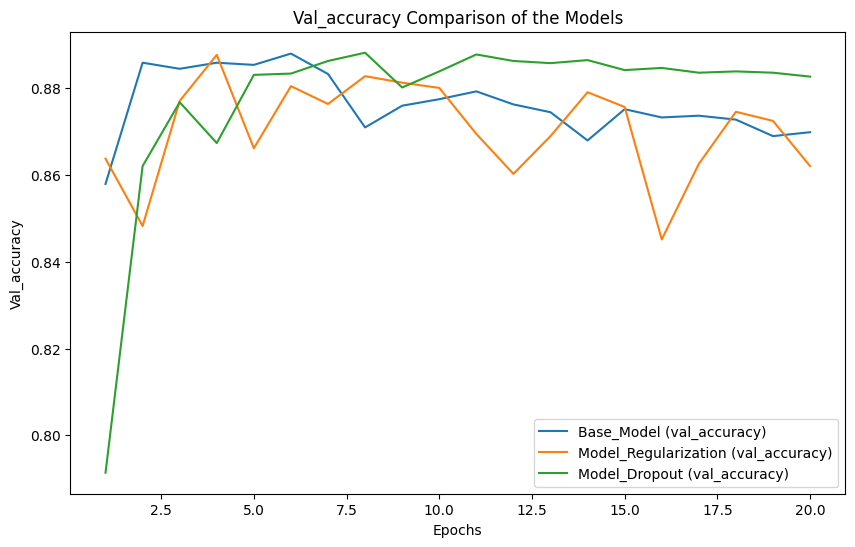

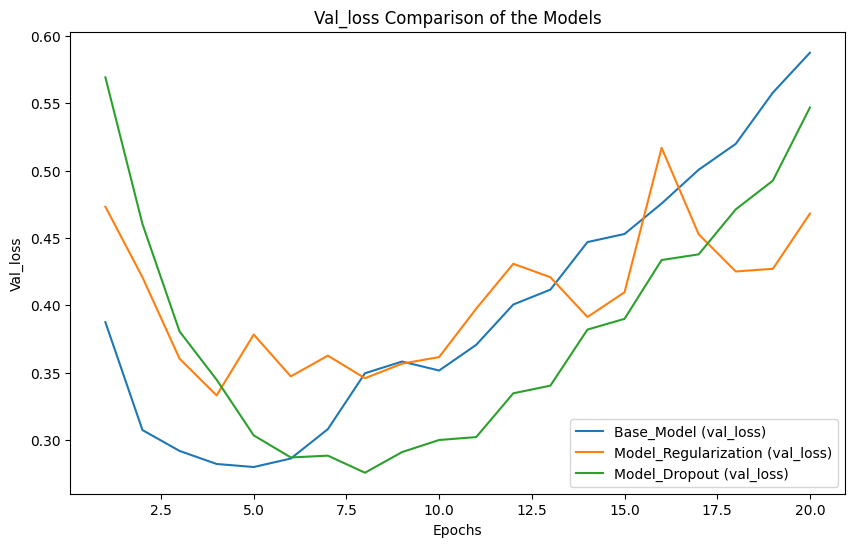

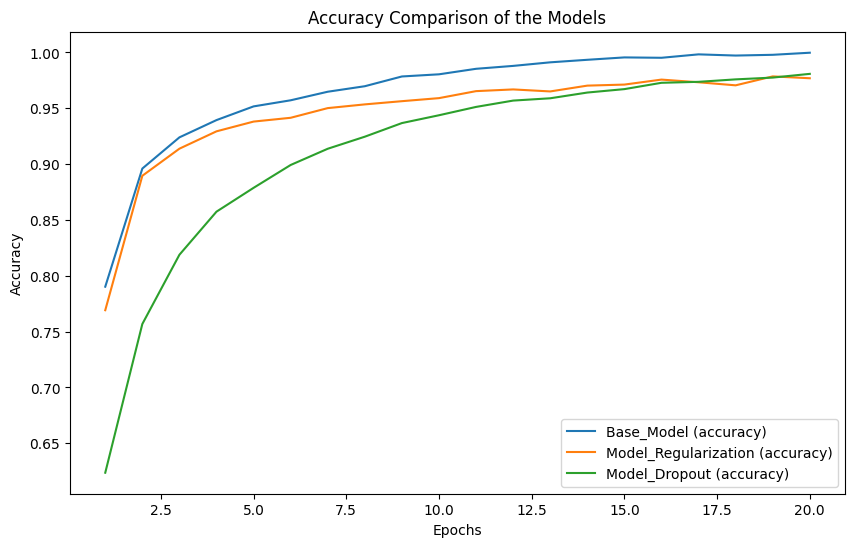

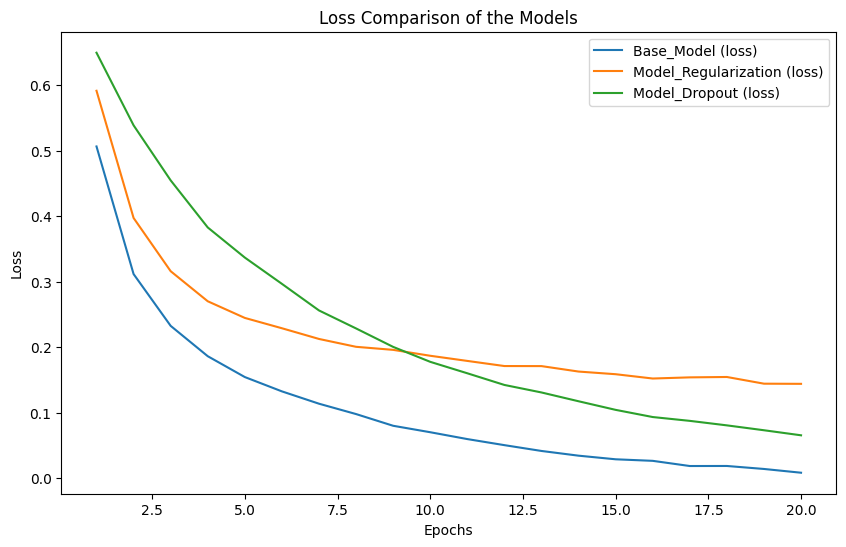

In [125]:
import matplotlib.pyplot as plt

# Dictionary of models and their histories
model_histories = {
    "Base_Model": Base_model,
    "Model_Regularization": Model_Reg,
    "Model_Dropout": Model_Drp
}

# Extract and display keys of histories
for model_name, model in model_histories.items():
    history_dict = model.history
    print(f"{model_name} history keys: {history_dict.keys()}")

# Function to plot training and validation accuracy/loss across models
def plot_metrics(metric):
    plt.figure(figsize=(10, 6))
    for model_name, model in model_histories.items():
        metric_values = model.history[metric]
        plt.plot(range(1, len(metric_values) + 1), metric_values, label=f"{model_name} ({metric})")

    plt.title(f'{metric.capitalize()} Comparison of the Models')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.show()

# Plot validation accuracy
plot_metrics('val_accuracy')

# Plot validation loss
plot_metrics('val_loss')

plot_metrics('accuracy')

plot_metrics('loss')

Comparing all the models


Base_Model history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_1_Hidden_Layer history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_3_Hidden_Layer history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_32_Hidden_Units history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_64_Hidden_Units history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_MSE_Loss history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_TANH_Activation history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_Regularization history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_Dropout history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


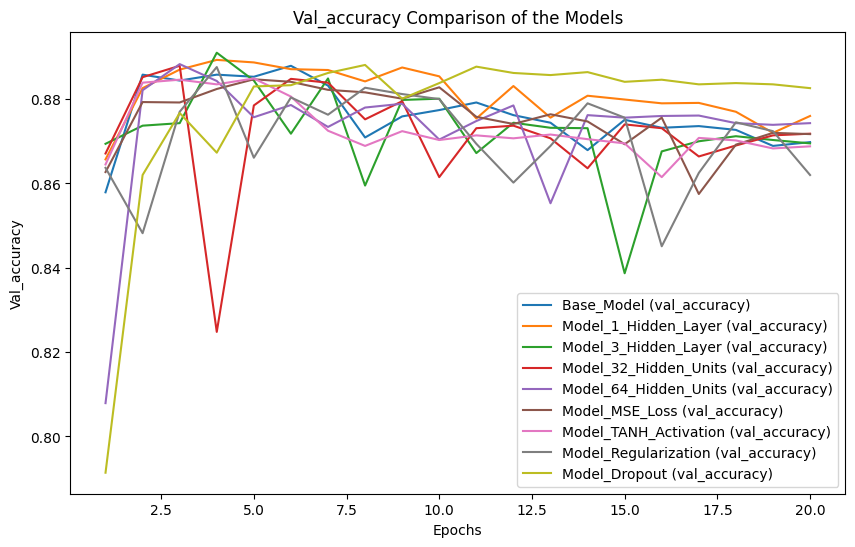

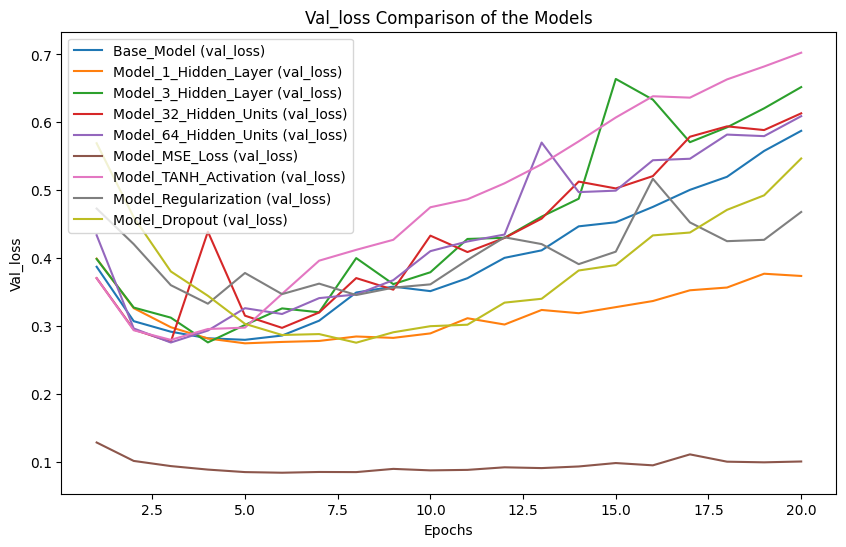

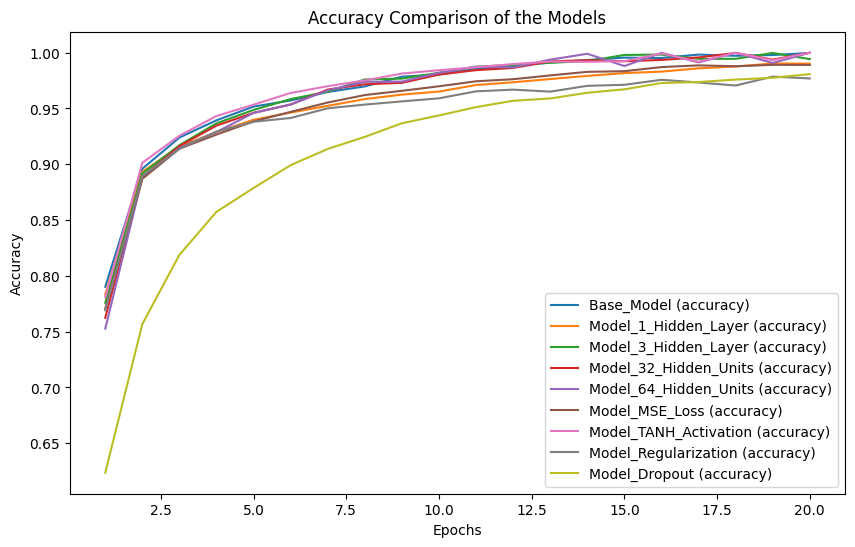

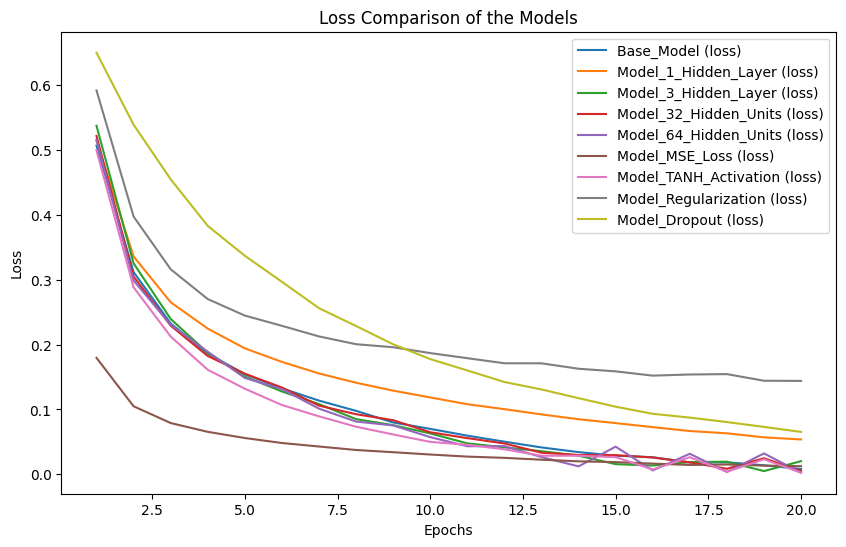

In [124]:
import matplotlib.pyplot as plt

# Dictionary of models and their histories
model_histories = {
    "Base_Model": Base_model,
    "Model_1_Hidden_Layer": Model_1_HL,
    "Model_3_Hidden_Layer": Model_3_HL,
    "Model_32_Hidden_Units": Model_32_HU,
    "Model_64_Hidden_Units": Model_64_HU,
    "Model_MSE_Loss": Model_MSE_LOSS,
    "Model_TANH_Activation": Model_TANH,
    "Model_Regularization": Model_Reg,
    "Model_Dropout": Model_Drp
}

# Extract and display keys of histories
for model_name, model in model_histories.items():
    history_dict = model.history
    print(f"{model_name} history keys: {history_dict.keys()}")

# Function to plot training and validation accuracy/loss across models
def plot_metrics(metric):
    plt.figure(figsize=(10, 6))
    for model_name, model in model_histories.items():
        metric_values = model.history[metric]
        plt.plot(range(1, len(metric_values) + 1), metric_values, label=f"{model_name} ({metric})")

    plt.title(f'{metric.capitalize()} Comparison of the Models')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.show()

# Plot validation accuracy
plot_metrics('val_accuracy')

# Plot validation loss
plot_metrics('val_loss')

plot_metrics('accuracy')

plot_metrics('loss')